In [267]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import scipy.stats as stats
import re
import gender_guesser.detector as gender
from gender_detector import gender_detector as gd
pd.options.display.float_format = '{:,.2f}'.format

# Assumptions

- Business runners run faster than recreational runners
- Female and male business runners run faster than the recreational runners in the same sex 

First we import the data set for business runners and recreationist. We have 3 years of data for business runners and 5 years for recreationist runners

First dataset <b> businessrunnersdtd_16_18.csv </b> contains the business runners https://drive.google.com/drive/folders/1PxVVV8jvPLDTuU3Fz6Umo4QN2aJcJJiw. Place it in the data folder of this repository

In [250]:
df_bus = pd.read_csv('data/businessdamtotdamloopdata2016_2017.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1']).drop_duplicates()

Second set are the recreationist runners. <b>recreationalrunnersdtd_16_18.csv</b> 

In [254]:
df_recr = pd.read_csv('data/damtotdamloopdata.csv').drop(columns=['Unnamed: 0'])
df_recr = df_recr.loc[df_recr.year.isin([2016,2017,2018])]

This prints the mean of both sets

In [255]:
print('Mean speed businsess runners : {0:.2f}'.format(df['speed'].mean()),
      'Mean speed recreationist runners: {0:.2f}'.format(
      df1.loc[df1.year.isin([2016,2017,2018])]['speed'].mean()))

Mean speed businsess runners : 10.69 Mean speed recreationist runners: 10.43


plot the distribution of both sets

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


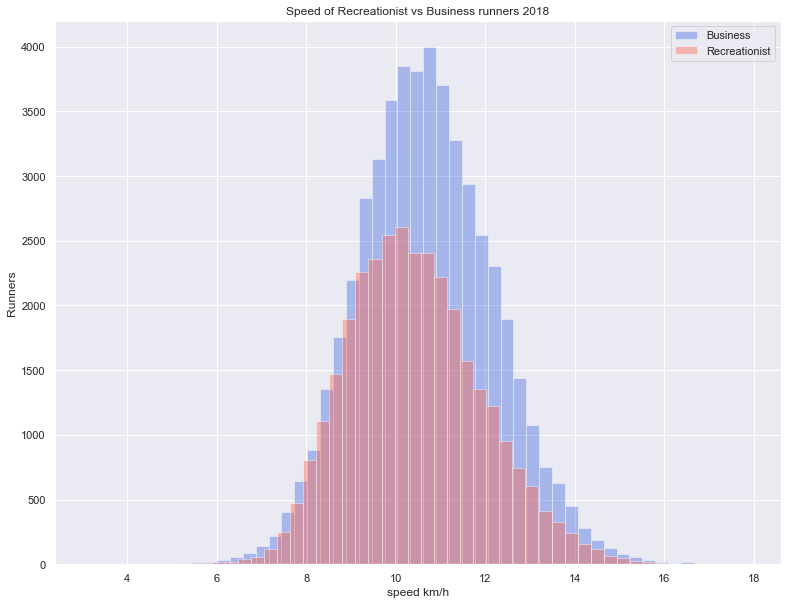

''

In [256]:
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
sns.distplot(df['speed'],label='Business',kde=False,color="royalblue")
sns.distplot(df1.loc[df1.year.isin([2016,2017,2018])]['speed'],label='Recreationist',kde=False,color="tomato")
plt.title('Speed of Recreationist vs Business runners 2018')
plt.xlabel('speed km/h')
plt.legend()
plt.ylabel('Runners')
plt.show()
;

The results shows that the mean of business runners is higher than recreationist runners. We will start testing 
whether the means of both populations are statistically different.  

In [257]:
t, p = stats.ttest_ind(df['speed'],df1.loc[df1.year.isin([2016,2017,2018])]['speed'], equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
24.586131483012966 6.4507303625486335e-133


This gives us the feeling that the business runners run faster. When running :) through the data we have the feeling that the business runners are predominantly male. In our previous assignment we saw that males run faster than females and that would explain why business runners run faster on average. 

We are going to check this. Our business runners dataset does not contain a column for gender we have to gender guess the sex based on their first names. 

This function guesses the genders of all the names that we have in our will be guessed with the below function. It uses a combination of the libraries <b>gender_guesser<b/>

In [263]:
def guess_gender(df,column):
    df['firstname'] = df[column].apply(lambda x : re.match('([^-]+)',re.match('([^\s]+)',str(x))[0])[0].lower().title())
    lst = list(df['firstname'].drop_duplicates())
    gend = gender.Detector()
    names = pd.DataFrame()
    for i in lst:
    

        d = {'name' : i,
             'gender' : gend.get_gender(i),
             }
        names = names.append(d,ignore_index=True)
    
    
    
    lst2 = list(names.loc[names.gender == 'unknown']['name'])

    names2 = pd.DataFrame()

    x = 0
    for i in lst2:

        try:
            d = {'name' : i,
                 'gender_uk' : gd.GenderDetector('uk').guess(str(i)),
                 'gender_us' : gd.GenderDetector('us').guess(str(i)),
                 'gender_uy' : gd.GenderDetector('uy').guess(str(i)),
                 'gender_ar' : gd.GenderDetector('ar').guess(str(i))
                 }

        except (KeyError,UnicodeDecodeError):
            try: 
                d = {'name' : i,
                     'gender_uk' : gd.GenderDetector('uk').guess(str(i)),
                     'gender_us' : gd.GenderDetector('us').guess(str(i)),
                     'gender_uy' : gd.GenderDetector('uy').guess(str(i)),
                     'gender_ar' : 'unknown'
                     }
            except (KeyError,UnicodeDecodeError):      
                d = {'name' : i,
                     'gender_uk' : 'unknown',
                     'gender_us' : 'unknown',
                     'gender_uy' : 'unknown',
                     'gender_ar' : 'unknown'
                     }
        x= x +1
        print(x)    
        names2 = names2.append(d,ignore_index=True)

    names2['gender'] = np.where(names2.gender_uk != 'unknown',names2.gender_uk,
                            np.where(names2.gender_us != 'unknown',names2.gender_us,
                                     np.where(names2.gender_uy != 'unknown',names2.gender_uy,'unknown')))  


    final = pd.concat([names.loc[names.gender != 'unknown'],names2[['gender','name']]])

    return final


    

In [144]:
df['firstname'] = df['name'].apply(lambda x : re.match('([^-]+)',re.match('([^\s]+)',str(x))[0])[0].lower().title())
lst = list(df['firstname'].drop_duplicates())
gend = gender.Detector()
names = pd.DataFrame()

for i in lst:
    
    
    d = {'name' : i,
         'gender' : gend.get_gender(i),
         }
    names = names.append(d,ignore_index=True)


In [186]:
lst2 = list(names.loc[names.gender == 'unknown']['name'])

names2 = pd.DataFrame()

x = 0
for i in lst2[1308:]:
    
    try:
        d = {'name' : i,
             'gender_uk' : gd.GenderDetector('uk').guess(str(i)),
             'gender_us' : gd.GenderDetector('us').guess(str(i)),
             'gender_uy' : gd.GenderDetector('uy').guess(str(i)),
             'gender_ar' : gd.GenderDetector('ar').guess(str(i))
             }
    
    except (KeyError,UnicodeDecodeError):
        try: 
            d = {'name' : i,
                 'gender_uk' : gd.GenderDetector('uk').guess(str(i)),
                 'gender_us' : gd.GenderDetector('us').guess(str(i)),
                 'gender_uy' : gd.GenderDetector('uy').guess(str(i)),
                 'gender_ar' : 'unknown'
                 }
        except (KeyError,UnicodeDecodeError):      
            d = {'name' : i,
                 'gender_uk' : 'unknown',
                 'gender_us' : 'unknown',
                 'gender_uy' : 'unknown',
                 'gender_ar' : 'unknown'
                 }
    x= x +1
    print(x)    
    names2 = names2.append(d,ignore_index=True)

names2['gender'] = np.where(names2.gender_uk != 'unknown',names2.gender_uk,
                            np.where(names2.gender_us != 'unknown',names2.gender_us,
                                     np.where(names2.gender_uy != 'unknown',names2.gender_uy,'unknown')))  
    
 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
names = guess_gender(df_bus,column='name')

In [277]:
df3 = pd.merge(df_bus,final,how='left',left_on='firstname',right_on='name')

We identified the following numbers as male / female

In [285]:
df_recr['sex'].value_counts() / len(df_recr)

Male     0.58
Female   0.42
Name: sex, dtype: float64

In [299]:
df3['gender'].value_counts() / len(df3)

male            0.58
female          0.25
unknown         0.13
mostly_male     0.02
mostly_female   0.01
andy            0.01
Name: gender, dtype: float64

These numbers seems to explain why business runners run faster. We therefore run the tests again for males / females separately  

In [290]:
females_bus = df3.loc[df3.gender.isin(['mostly_female', 'female'])]['speed']
females_recr = df_recr.loc[(df_recr.sex == 'Female') ]['speed']


print('Mean speed female business runners : {0:.2f}'.format(females_bus.mean()),
      'Mean speed female recreationist runners: {0:.2f}'.format(females_recr.mean()))

Mean speed female business runners : 9.95 Mean speed female recreationist runners: 9.84


In [291]:
males_bus = df3.loc[df3.gender.isin(['mostly_male', 'male'])]['speed']
males_recr = df_recr.loc[(df_recr.sex == 'Male') ]['speed']


print('Mean speed male business runners : {0:.2f}'.format(males_bus.mean()),
      'Mean speed male recreationist runners: {0:.2f}'.format(males_recr.mean()))

Mean speed male business runners : 11.03 Mean speed male recreationist runners: 10.86


For both males and females the speeds are higher for business runners than recreationist runners  

In [296]:
t, p = stats.ttest_ind(males_bus,
                       males_recr, equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
11.823741567222205 3.330247872076435e-32


In [297]:
t, p = stats.ttest_ind(females_bus,
                       females_recr, equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
7.45951678502178 8.947391585773252e-14


In both cases we reject that the means are equal therefore finding statiscally reason to assume that business runnners are faster 

We are now going to test whether our assumptions holds for the three years individually

In [308]:
for i in range(2016,2019):
    
    t, p = stats.ttest_ind(
        df_recr.loc[(df_recr.sex == 'Female') & (df_recr.year == i) ]['speed'],
                       df3.loc[df3.gender.isin(['mostly_female', 'female']) & (df3.year == i) ]['speed'], 
                           
                           equal_var = False)

    if p<0.05:
        print('We reject that H0 that means are the same')
    else:
        print('We cannot reject that H0 that means are the same')
    print(t,p)   

We reject that H0 that means are the same
-5.01034272841407 5.536175007770701e-07
We reject that H0 that means are the same
-5.664606660058192 1.5197619325938436e-08
We reject that H0 that means are the same
-3.64030362645762 0.0002739878091367542


In [309]:
for i in range(2016,2019):
    
    t, p = stats.ttest_ind(
        df_recr.loc[(df_recr.sex == 'Male') & (df_recr.year == i) ]['speed'],
                       df3.loc[df3.gender.isin(['mostly_male', 'male']) & (df3.year == i) ]['speed'], 
                           
                           equal_var = False)

    if p<0.05:
        print('We reject that H0 that means are the same')
    else:
        print('We cannot reject that H0 that means are the same')
    print(t,p)   

We reject that H0 that means are the same
-5.606892264726853 2.108049305268176e-08
We reject that H0 that means are the same
-9.02033148752497 2.1104417742545502e-19
We reject that H0 that means are the same
-7.686801494740641 1.6078682061488644e-14


# Our conclusions are:
    
    - It seems that the businessrun attracts relatively more males than female
    - Males that have participated in the 2016 - 2018 ran faster than males that participated in the recreational run 
    - Females participated in the 2016 - 2018 ran faster than females that participated in the recreational run 

# For further improvement.

- Test additional gender guessing algorithmes 
- We don't have age as a variable. We assume that business runners are in general younger than recreational runners